<a href="https://colab.research.google.com/github/umeshgupta05/Handwritten-Pattern-Classifier-for-Parkinson-s-Detection-and-Image-Recognition/blob/main/Day2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
tf.__version__

'2.17.1'

In [ ]:
from tensorflow import keras
from tensorflow.keras.datasets import cifar10

In [ ]:
cifar10

<module 'keras.api.datasets.cifar10' from '/usr/local/lib/python3.11/dist-packages/keras/api/datasets/cifar10/__init__.py'>

In [ ]:
NUM_CLASSES = 10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [ ]:
type(x_train)

numpy.ndarray

In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
type(y_train)
y_train.shape

(50000, 1)

In [ ]:
y_train;x_train;

In [ ]:
x_train=x_train.astype('float32')/255.0
x_test=x_test.astype('float32')/255.0
x_train

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

In [ ]:
y_train[0]

array([6], dtype=uint8)

In [ ]:
#convert the target variable which is in categories using ONE HOT ENCODIMG
y_train=keras.utils.to_categorical(y_train,NUM_CLASSES)
y_test=keras.utils.to_categorical(y_test,NUM_CLASSES)

In [ ]:
y_train[100]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.])

In [ ]:
#Once we transform our input data and target , we start building the model
#Sequential Model --> Input layer , Hidden layer , target layer
from keras.models import Sequential
from keras.layers import Dense,Flatten

In [ ]:
#Let us pass the data to the model by embedding the dense layers
model=Sequential([Dense(200,activation="relu",input_shape=(32,32,3)),
                  Flatten(),
                  Dense(150,activation="relu"),
                  Dense(10,activation="softmax"),
                  ])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
#Let us get into the functional approach
from keras.models import Model
from keras.layers import Input
#we will define each step in a functional way
input_layer=Input(shape=(32,32,3))
x=Flatten()(input_layer)
x=Dense(units=200,activation='relu')(x)
x=Dense(units=150,activation='relu')(x)
output_layer=Dense(units=10,activation='softmax')(x)
model=Model(inputs=input_layer,outputs=output_layer)
model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)           │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 200)                 │         614,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 150)                 │          30,150 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 10)                  │           1,510 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 646,260 (2.47 MB)

 Trainable params: 646,260 (2.47 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#We will start reading the model
from tensorflow.keras.optimizers import Adam
opt=Adam(learning_rate=0.0005)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
# Fit the data to model

model.fit(x_train,y_train,batch_size=32,epochs=10,shuffle=True)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.2867 - loss: 1.9691
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3920 - loss: 1.7021
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4288 - loss: 1.5993
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4501 - loss: 1.5464
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.4710 - loss: 1.4955
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4790 - loss: 1.4647
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4826 - loss: 1.4464
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.4947 - loss: 1.4183
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5016 - loss: 1.3989
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5151 - loss: 1.3594


In [ ]:
#Start applying CNN part to the model
#We will define the layers in cnn one by one
from tensorflow.keras.layers import Conv2D, MaxPooling2D


# Convolutional Neural Network (CNN)
input_layer=Input(shape=(32,32,3))

conv_layer_1=Conv2D(filters=10,
                    kernel_size=(4,4),
                    strides=2,
                    padding='same',
                    )(input_layer)
conv_layer_2=Conv2D(filters=20,
                    kernel_size=(3,3),
                    strides=2,
                    padding='same'
                    )(conv_layer_1)

flatten_layer=Flatten()(conv_layer_2)
output_layer=Dense(units=10,
                   activation='softmax')(flatten_layer)
model=Model(inputs=input_layer,outputs=output_layer)
model.summary()

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)           │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 16, 16, 10)          │             490 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 8, 8, 20)            │           1,820 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 1280)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 10)                  │          12,810 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,120 (59.06 KB)

 Trainable params: 15,120 (59.06 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from keras.layers import BatchNormalization, Dropout, LeakyReLU, Activation
#We will define input layers
input_layer=Input(shape=(32,32,3))

x=Conv2D(filters=32,
         kernel_size=(3,3),
         strides=1,
         padding='same')(input_layer)
x=BatchNormalization()(x)
x=LeakyReLU()(x)

x=Conv2D(filters=32,
         kernel_size=(3,3),
         strides=2,
         padding='same')(x)
x=BatchNormalization()(x)
x=LeakyReLU()(x)

x=Conv2D(filters=64,
         kernel_size=(3,3),
         strides=1,
         padding='same')(x)
x=BatchNormalization()(x)
x=LeakyReLU()(x)

x=Conv2D(filters=64,
         kernel_size=(3,3),
         strides=2,
         padding='same')(x)
x=BatchNormalization()(x)
x=LeakyReLU()(x)

x=Flatten()(x)
x=Dense(128)(x)

x=BatchNormalization()(x)
x=LeakyReLU()(x)
x=Dropout(rate=0.5)(x)
x=Dense(NUM_CLASSES)(x)

output_layer=Activation('softmax')(x)
model=Model(inputs=input_layer,outputs=output_layer)

opt=Adam(learning_rate=0.0005)
model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train,y_train,
          batch_size=32,
          epochs=10,
          shuffle=True,
          validation_data=(x_test,y_test))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.3844 - loss: 1.8162 - val_accuracy: 0.5231 - val_loss: 1.3542
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5717 - loss: 1.1950 - val_accuracy: 0.5358 - val_loss: 1.3746
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6415 - loss: 1.0222 - val_accuracy: 0.6379 - val_loss: 1.0368
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.6791 - loss: 0.9141 - val_accuracy: 0.6255 - val_loss: 1.0504
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7046 - loss: 0.8462 - val_accuracy: 0.6909 - val_loss: 0.8905
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7158 - loss: 0.8080 - val_accuracy: 0.7042 - val_loss: 0.8493
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.7366 - loss: 0.7507 - val_accuracy: 0.7078 - val_loss: 0.8581
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7515 - loss: 0.7110

In [ ]:
#We will evaluate the model and check for predictions
model.evaluate(x_test,y_test,batch_size=1000) #as we are checking for prediction

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7156 - loss: 0.8534


[0.8620688319206238, 0.7132999897003174]

In [ ]:
#We will check how our model made predictions
import matplotlib.pyplot as plt
import numpy as np
#We will define number of classes
CLASSES=np.array(['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck'])

In [ ]:
preds=model.predict(x_test)
#preds[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [ ]:
#We start converting to get maximum index
preds_single=CLASSES[np.argmax(preds,axis=-1)]
actual_single=CLASSES[np.argmax(y_test,axis=-1)]

In [ ]:
preds_single[0];actual_single[0]

'cat'

In [ ]:
#We need to display the images
n_to_show = 5
indices = np.random.choice(range(len(x_test)), n_to_show)
print(indices)

[2374 9548 3233 8934 5105]


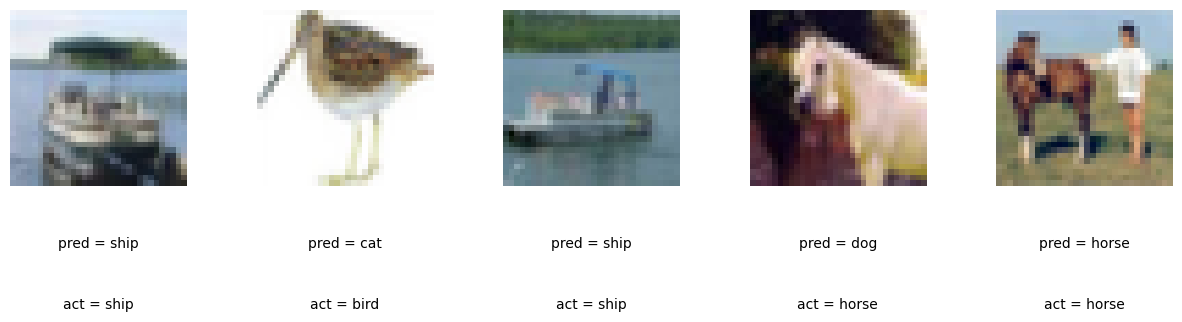

In [ ]:
fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

#then we will add our required data values to it
for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]),
            fontsize=10, ha='center', transform=ax.transAxes)
    ax.text(0.5, -0.7, 'act = ' + str(actual_single[idx]),
            fontsize=10, ha='center', transform=ax.transAxes)
    ax.imshow(img)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#We will work on handwritten pattern dataset
import sklearn

In [ ]:
#We will use imutils to understand the path and read the folder

from imutils import paths
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
#First let us check the path of dataset
import os
os.listdir('/content/drive/MyDrive/dataset')

['spiral', 'wave']

In [ ]:
#We will use imutils to get the path and read and opencv for image processing
import cv2
#define dataset paths
spiral_training_path='/content/drive/MyDrive/dataset/spiral/training'
spiral_testing_path='/content/drive/MyDrive/dataset/spiral/testing'
wave_training_path='/content/drive/MyDrive/dataset/wave/training'
wave_testing_path='/content/drive/MyDrive/dataset/wave/testing'

In [ ]:
#before reading the images from above paths let us apply HOG transformation and preprocess the data
from skimage import feature
def quantity_image(image):
    features=feature.hog(image,
                        orientations=9,
                        pixels_per_cell=(10,10),
                        cells_per_block=(2,2),
                        transform_sqrt=True,
                        block_norm='L1')
    return features

In [ ]:
def load_and_process_image(path):
    imagePaths = list(paths.list_images(path))
    data = []
    labels = []
    for imagePath in imagePaths:
        # Extract the label from the subdirectory name
        label = imagePath.split(os.path.sep)[-2]
        image = cv2.imread(imagePath)
        if image is None:
            print(f"Failed to read: {imagePath}")
            continue
        # Preprocess the image
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        image = cv2.resize(image, (200, 200))
        image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
        features = quantity_image(image)  # HOG transformation
        data.append(features)
        labels.append(label)
    return np.array(data), np.array(labels)

In [ ]:
print("Spiral TrainX Shape:", spiral_trainX.shape)
print("Wave TrainX Shape:", wave_trainX.shape)
print("Spiral TrainY Length:", len(spiral_trainY))
print("Wave TrainY Length:", len(wave_trainY))

Spiral TrainX Shape: (0,)
Wave TrainX Shape: (104, 12996)
Spiral TrainY Length: 0
Wave TrainY Length: 104


In [ ]:
spiral_testX, spiral_testY = load_and_process_image(spiral_testing_path)
print("Spiral TestX Shape:", spiral_testX.shape)
print("Spiral TestY Length:", len(spiral_testY))
print("Unique Labels in Spiral TestY:", np.unique(spiral_testY))


Spiral TestX Shape: (121, 12996)
Spiral TestY Length: 121
Unique Labels in Spiral TestY: ['healthy' 'parkinson']


In [ ]:
# Load and preprocess the spiral and wave datasets
spiral_trainX, spiral_trainY = load_and_process_image(spiral_training_path)
spiral_testX, spiral_testY = load_and_process_image(spiral_testing_path)

wave_trainX, wave_trainY = load_and_process_image(wave_training_path)
wave_testX, wave_testY = load_and_process_image(wave_testing_path)

# Combine the datasets for training and testing
trainX = np.vstack([spiral_trainX, wave_trainX])
trainY = np.hstack([spiral_trainY, wave_trainY])

testX = np.vstack([spiral_testX, wave_testX])
testY = np.hstack([spiral_testY, wave_testY])

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode labels
label_encoder = LabelEncoder()
trainY = label_encoder.fit_transform(trainY)  # Fit and transform training labels
testY = label_encoder.transform(testY)        # Transform test labels using the same encoder

print("Encoded Classes:", label_encoder.classes_)  # Prints: ['healthy', 'parkinson']

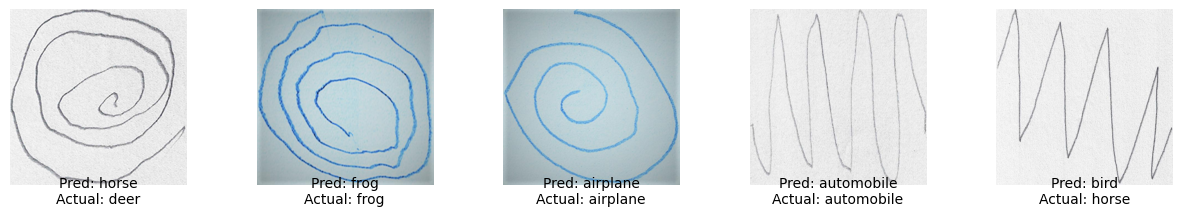

In [ ]:
# Combine image paths from both datasets
spiral_image_paths = list(paths.list_images(spiral_testing_path))
wave_image_paths = list(paths.list_images(wave_testing_path))
all_image_paths = spiral_image_paths + wave_image_paths

# Randomly select images for visualization
n_to_show = 5
indices = np.random.choice(range(len(all_image_paths)), n_to_show, replace=False)

fig = plt.figure(figsize=(15, 5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    original_image_path = all_image_paths[idx]
    original_image = cv2.imread(original_image_path)
    if original_image is None:
        print(f"Failed to read image at {original_image_path}")
        continue
    original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.imshow(original_image)
    ax.text(0.5, -0.1, f"Pred: {preds_single[idx]}\nActual: {actual_single[idx]}",
            fontsize=10, ha='center', transform=ax.transAxes)
